# Figures A4 & A5: Overall engine efficiency comparisons

In [2]:
import random
import json
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import cartopy.crs as ccrs
import cartopy.feature as cfeature

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
df = pd.read_csv('../../data/landsat_sentinel_collocations_20260212.csv', comment='#')

In [4]:
df = df[df["air_temperature_iagos_validity"] <= 0]
df = df[df["rhl_iagos_validity"] <= 0]
df = df[df["contrail_formation"].notna()]
df = df[df["efficiency_PS_IAGOS"].notna()]
df = df[df["efficiency_BADA4_IAGOS"].notna()]

df

,path,satellite,scene_id,sensing_time,crs,extent,visualization_url,base_url,icao24,registration,...,eastward_wind_iagos,air_temperature_era5,rhl_era5,rhi_era5,northward_wind_era5,eastward_wind_era5,efficiency_PS_IAGOS,efficiency_BADA4_IAGOS,efficiency_PS_ERA5,efficiency_BADA4_ERA5
0,intersects_landsat/2013/2013061301394804_LC812...,Landsat,LC81230482013164LGN01,2013-06-13T03:01:57.419284Z,EPSG:32649,"[375270.0, 415230.0, 1887930.0, 1911900.0]",NaN,NaN,899118,B-18806,...,-4.606446,227.460710,0.627994,0.963466,3.503712,-1.993433,0.323797,0.304126,0.321805,0.300653
42,intersects_landsat/2022/2022050909094906_LC804...,Landsat,LC80460272022129LGN00,2022-05-09T18:55:24.821202Z,EPSG:32610,"[576030.0, 616020.0, 5291580.0, 5315550.0]",NaN,NaN,3C6565,D-AIKE,...,1.619055,256.442185,0.722219,0.850710,-2.120831,1.105809,0.121737,0.000000,0.122808,0.000000
43,intersects_landsat/2022/2022022110014916_LC919...,Landsat,LC91960242022052LGN01,2022-02-21T10:21:40.161875Z,EPSG:32632,"[416610.0, 456570.0, 5695350.0, 5719320.0]",NaN,NaN,3C656F,D-AIKO,...,21.366187,225.659507,0.118767,0.185070,-12.969989,24.318870,0.326497,0.249609,0.327517,0.231190
44,intersects_landsat/2022/2022032810020516_LC920...,Landsat,LC92010232022087LGN01,2022-03-28T10:51:50.064664Z,EPSG:32631,"[387420.0, 427410.0, 5905860.0, 5929830.0]",NaN,NaN,3C656F,D-AIKO,...,7.650000,213.497185,0.108618,0.184906,5.980913,6.402760,0.337339,0.322530,0.338336,0.317442
45,intersects_landsat/2022/2022101609112116_LC801...,Landsat,LC80140232022289LGN00,2022-10-16T15:36:44.580630Z,EPSG:32619,"[455430.0, 495420.0, 5889390.0, 5913360.0]",NaN,NaN,3C656F,D-AIKO,...,9.699032,224.078362,0.024097,0.037994,30.058658,7.978957,0.337613,0.316230,0.339185,0.315257
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
740,intersects_sentinel/2018/2018072409002215_L1C_...,Sentinel,L1C_T21TWN_A007215_20180724T144754,2018-07-24 14:49:33.235331+00:00,EPSG:32621,"[499980.0, 609770.0, 5190250.0, 5300040.0]",NaN,gs://gcp-public-data-sentinel-2/tiles/21/T/WN/...,3C656F,D-AIKO,...,19.570000,218.467304,0.604194,0.993962,-21.462752,19.780225,0.339294,0.319525,0.341911,0.319548
741,intersects_sentinel/2018/2018020800540710_L1C_...,Sentinel,L1C_T53SMT_A013742_20180208T015321,2018-02-08 01:57:54.867618+00:00,EPSG:32653,"[399960.0, 509750.0, 3690250.0, 3800040.0]",NaN,gs://gcp-public-data-sentinel-2/tiles/53/S/MT/...,8991BD,B-18316,...,55.655886,226.787049,0.025595,0.039489,10.899633,58.856363,0.339680,0.315129,0.343551,0.318082
742,intersects_sentinel/2018/2018101408270502_L1C_...,Sentinel,L1C_T11SLA_A008390_20181014T185358,2018-10-14 18:53:58.820000+00:00,EPSG:32611,"[300000.0, 409790.0, 3990250.0, 4100040.0]",NaN,gs://gcp-public-data-sentinel-2/tiles/11/S/LA/...,3C64F4,D-AIGT,...,19.890900,224.379852,0.052534,0.082635,0.070418,20.930452,0.325817,0.301222,0.324529,0.300083
743,intersects_sentinel/2018/2018122515202308_L1C_...,Sentinel,L1C_T17TPH_A009418_20181225T160841,2018-12-25 16:11:25.710000+00:00,EPSG:32617,"[600000.0, 709790.0, 4690210.0, 4800000.0]",NaN,gs://gcp-public-data-sentinel-2/tiles/17/T/PH/...,A46AD6,N384HA,...,35.810000,222.191007,0.037725,0.060363,-3.408974,34.303424,0.315908,0.330889,0.319672,0.324406


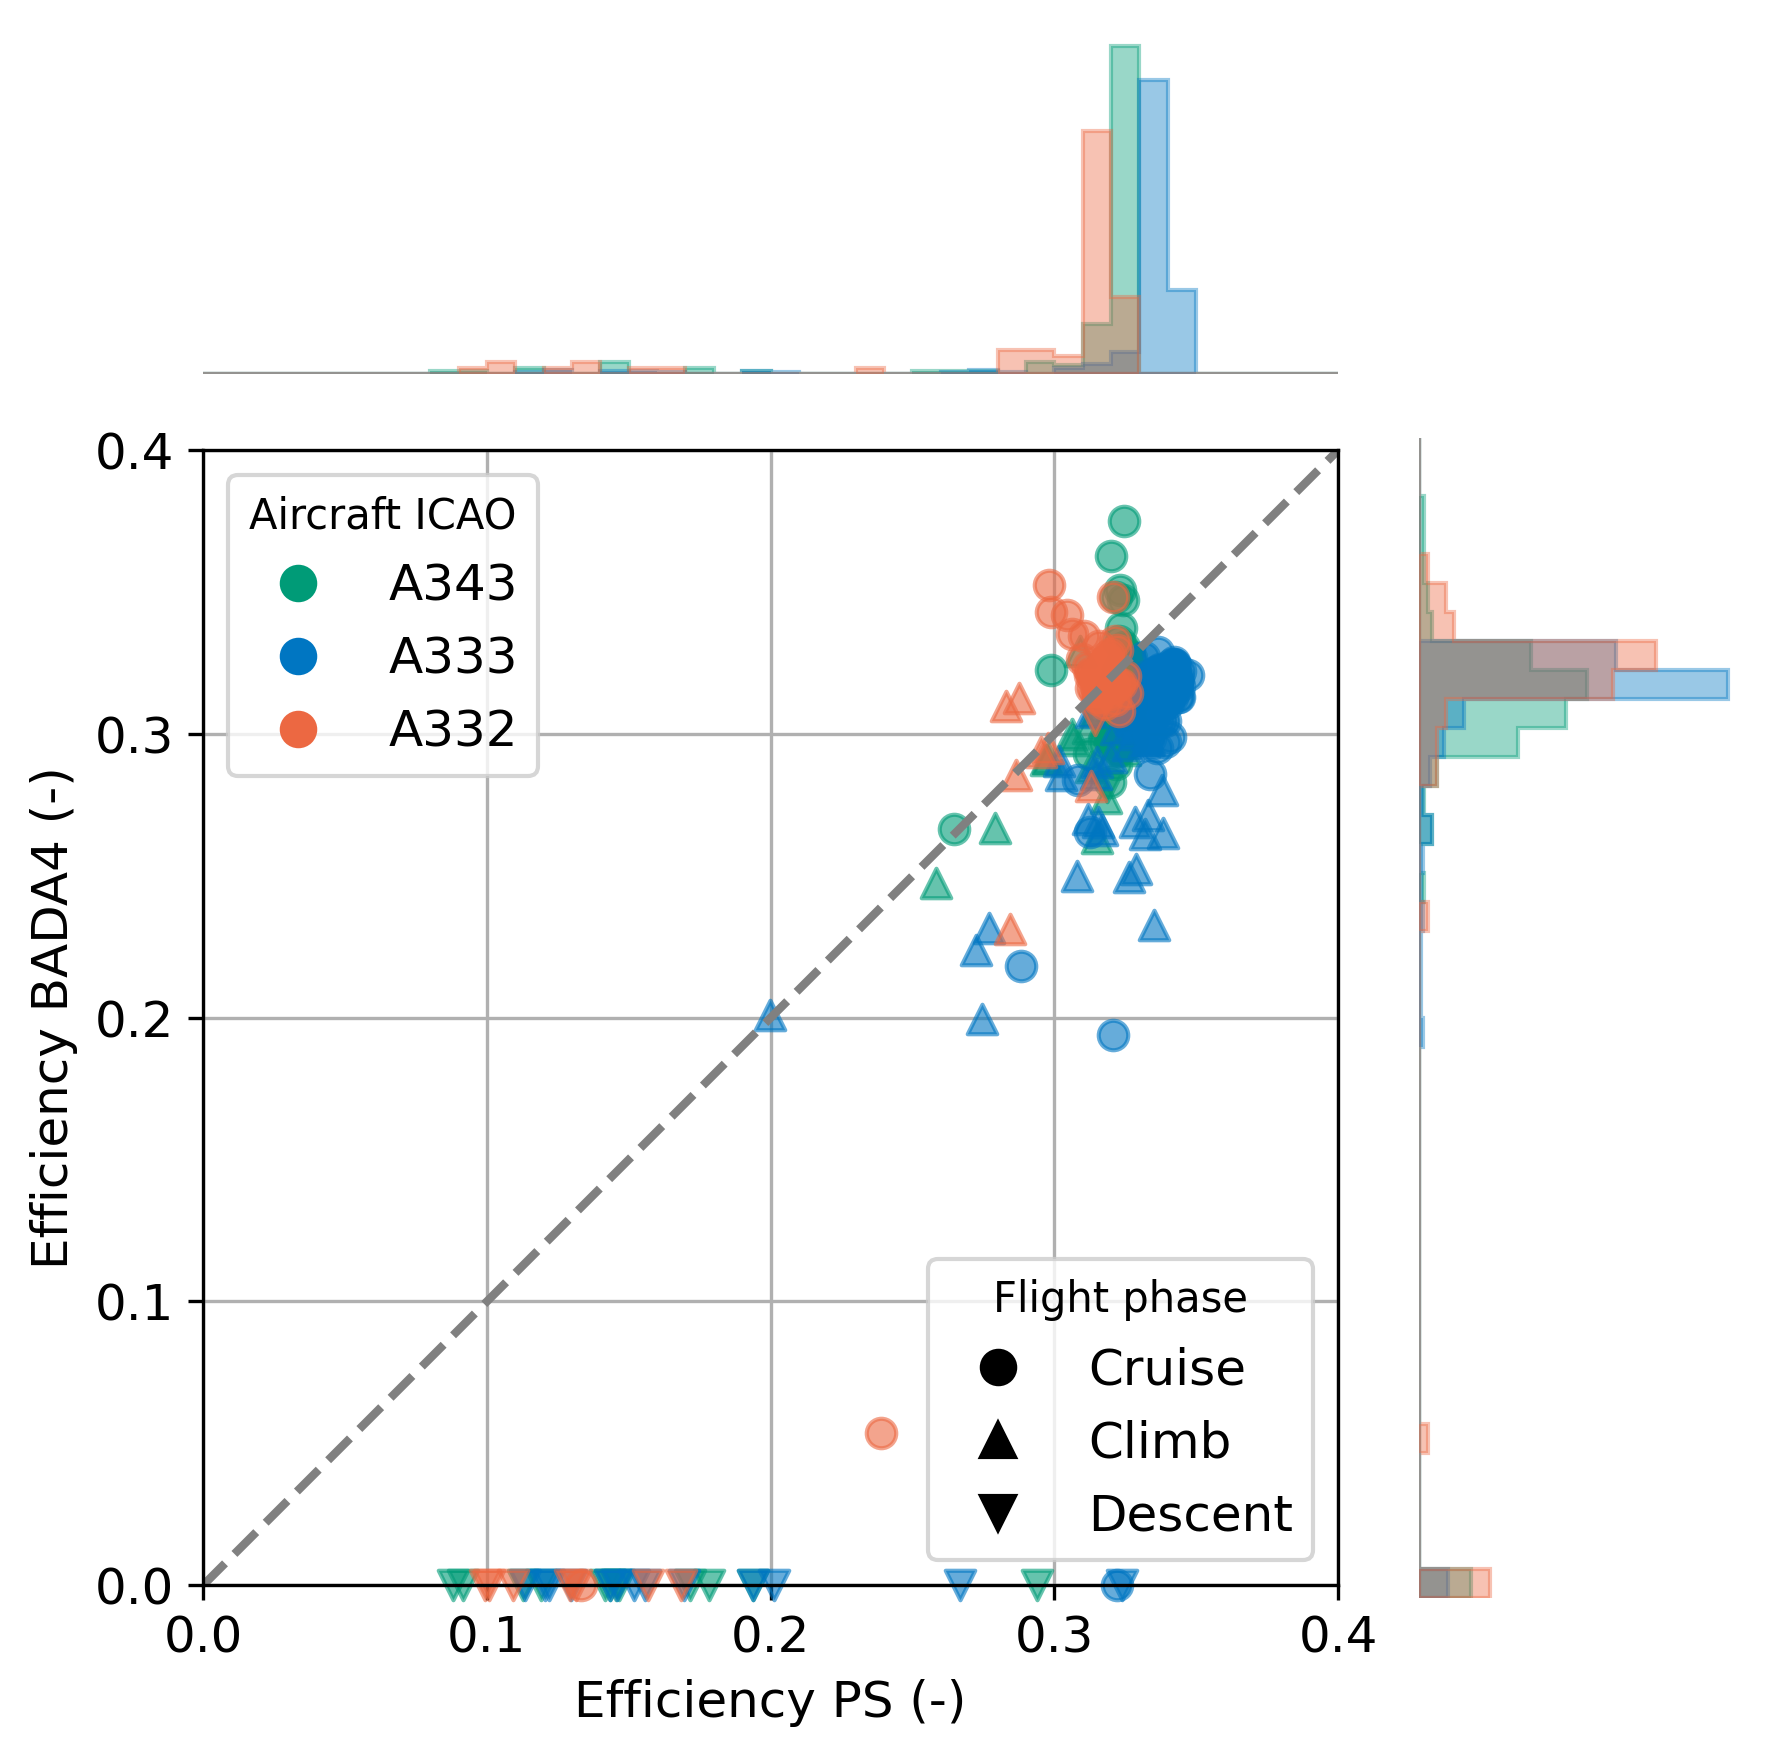

In [5]:

plt.rcParams.update({
    "axes.titlesize": 12,
    "axes.labelsize": 12,
    "xtick.labelsize": 12,
    "ytick.labelsize": 12,
    "legend.fontsize": 12
})

# Prepare flight phase function
def get_phase(vr):
    if abs(vr) < 100:
        return 'cruise'
    elif vr >= 100:
        return 'climb'
    else:
        return 'descent'

df['phase'] = df['vertical_rate'].apply(get_phase)

icao_codes = df['icao_code'].unique()
flight_phases = ['cruise', 'climb', 'descent']

# --- Color map for ICAO codes ---
colors = plt.cm.tab10.colors
color_map = {code: colors[i % len(colors)] for i, code in enumerate(icao_codes)}

# --- Marker map for flight phases ---
markers = ['o', '^', 's', 'D', 'v', 'P', 'X', '*']
marker_map = {code: markers[i % len(markers)] for i, code in enumerate(icao_codes)}

phase_marker_map = {
    'cruise': 'o',
    'climb': '^',
    'descent': 'v'
}

color_map = {
    "A333": '#0076c2',
    "A332": '#ec6842',
    "A343": "#009b77",
}


# --- Create figure with gridspec ---
fig = plt.figure(figsize=(6,6), dpi=300)
gs = fig.add_gridspec(4,4)
ax_main = fig.add_subplot(gs[1: , 0:3])
ax_xhist = fig.add_subplot(gs[0, 0:3], sharex=ax_main)
ax_yhist = fig.add_subplot(gs[1:, 3], sharey=ax_main)

# --- Scatter plot on main axes ---
for code in icao_codes:
    subset = df[df['icao_code'] == code]
    for phase in flight_phases:
        phase_subset = subset[subset['phase'] == phase]
        ax_main.scatter(
            phase_subset['efficiency_PS_IAGOS'],
            phase_subset['efficiency_BADA4_IAGOS'],
            alpha=0.6,
            color=color_map[code],        # <-- color = aircraft
            marker=phase_marker_map[phase],     # <-- marker = phase
            s=50,
            clip_on=False
        )

# 1:1 line
ax_main.plot([0,0.4],[0,0.4], color='grey', linestyle='--', linewidth=2)

# Axes limits, ticks, grid
ax_main.set_xlim(0,0.4)
ax_main.set_ylim(0,0.4)
ax_main.set_xticks(np.arange(0,0.5,0.1))
ax_main.set_yticks(np.arange(0,0.5,0.1))
ax_main.set_xlabel("Efficiency PS (-)")
ax_main.set_ylabel("Efficiency BADA4 (-)")
ax_main.grid(True, which='major')
ax_main.set_aspect('equal', adjustable='box')
ax_main.set_axisbelow(True)

# --- Marginal distributions (per aircraft ICAO) ---
for code in icao_codes:
    subset = df[df['icao_code'] == code]

    ax_xhist.hist(
        subset['efficiency_PS_IAGOS'],
        bins=np.arange(0, 0.45, 0.01),
        density=True,
        histtype='stepfilled',
        alpha=0.4,
        linewidth=1,
        edgecolor=color_map[code],
        color=color_map[code]
    )

    ax_yhist.hist(
        subset['efficiency_BADA4_IAGOS'],
        bins=np.arange(0, 0.45, 0.01),
        density=True,
        histtype='stepfilled',
        alpha=0.4,
        linewidth=1,
        orientation='horizontal',
        edgecolor=color_map[code],
        color=color_map[code]
    )


ax_xhist.axis('off')
ax_yhist.axis('off')

# --- Separate legends ---
handles_color = [
    plt.Line2D([0],[0],
               marker='o',
               linestyle='',
               color=color_map[code],
               markersize=8,
               label=code)
    for code in icao_codes
]

legend1 = ax_main.legend(
    handles=handles_color,
    title="Aircraft ICAO",
    loc="upper left"
)

handles_marker = [
    plt.Line2D([0],[0],
               marker=phase_marker_map[phase],
               linestyle='',
               color='k',
               markersize=8,
               label=phase.capitalize())
    for phase in flight_phases
]

legend2 = ax_main.legend(
    handles=handles_marker,
    title="Flight phase",
    loc="lower right"
)

ax_main.add_artist(legend1)

plt.tight_layout()
plt.savefig("figures/figA4.png", dpi=300, bbox_inches='tight', pad_inches=0.1)
plt.show()

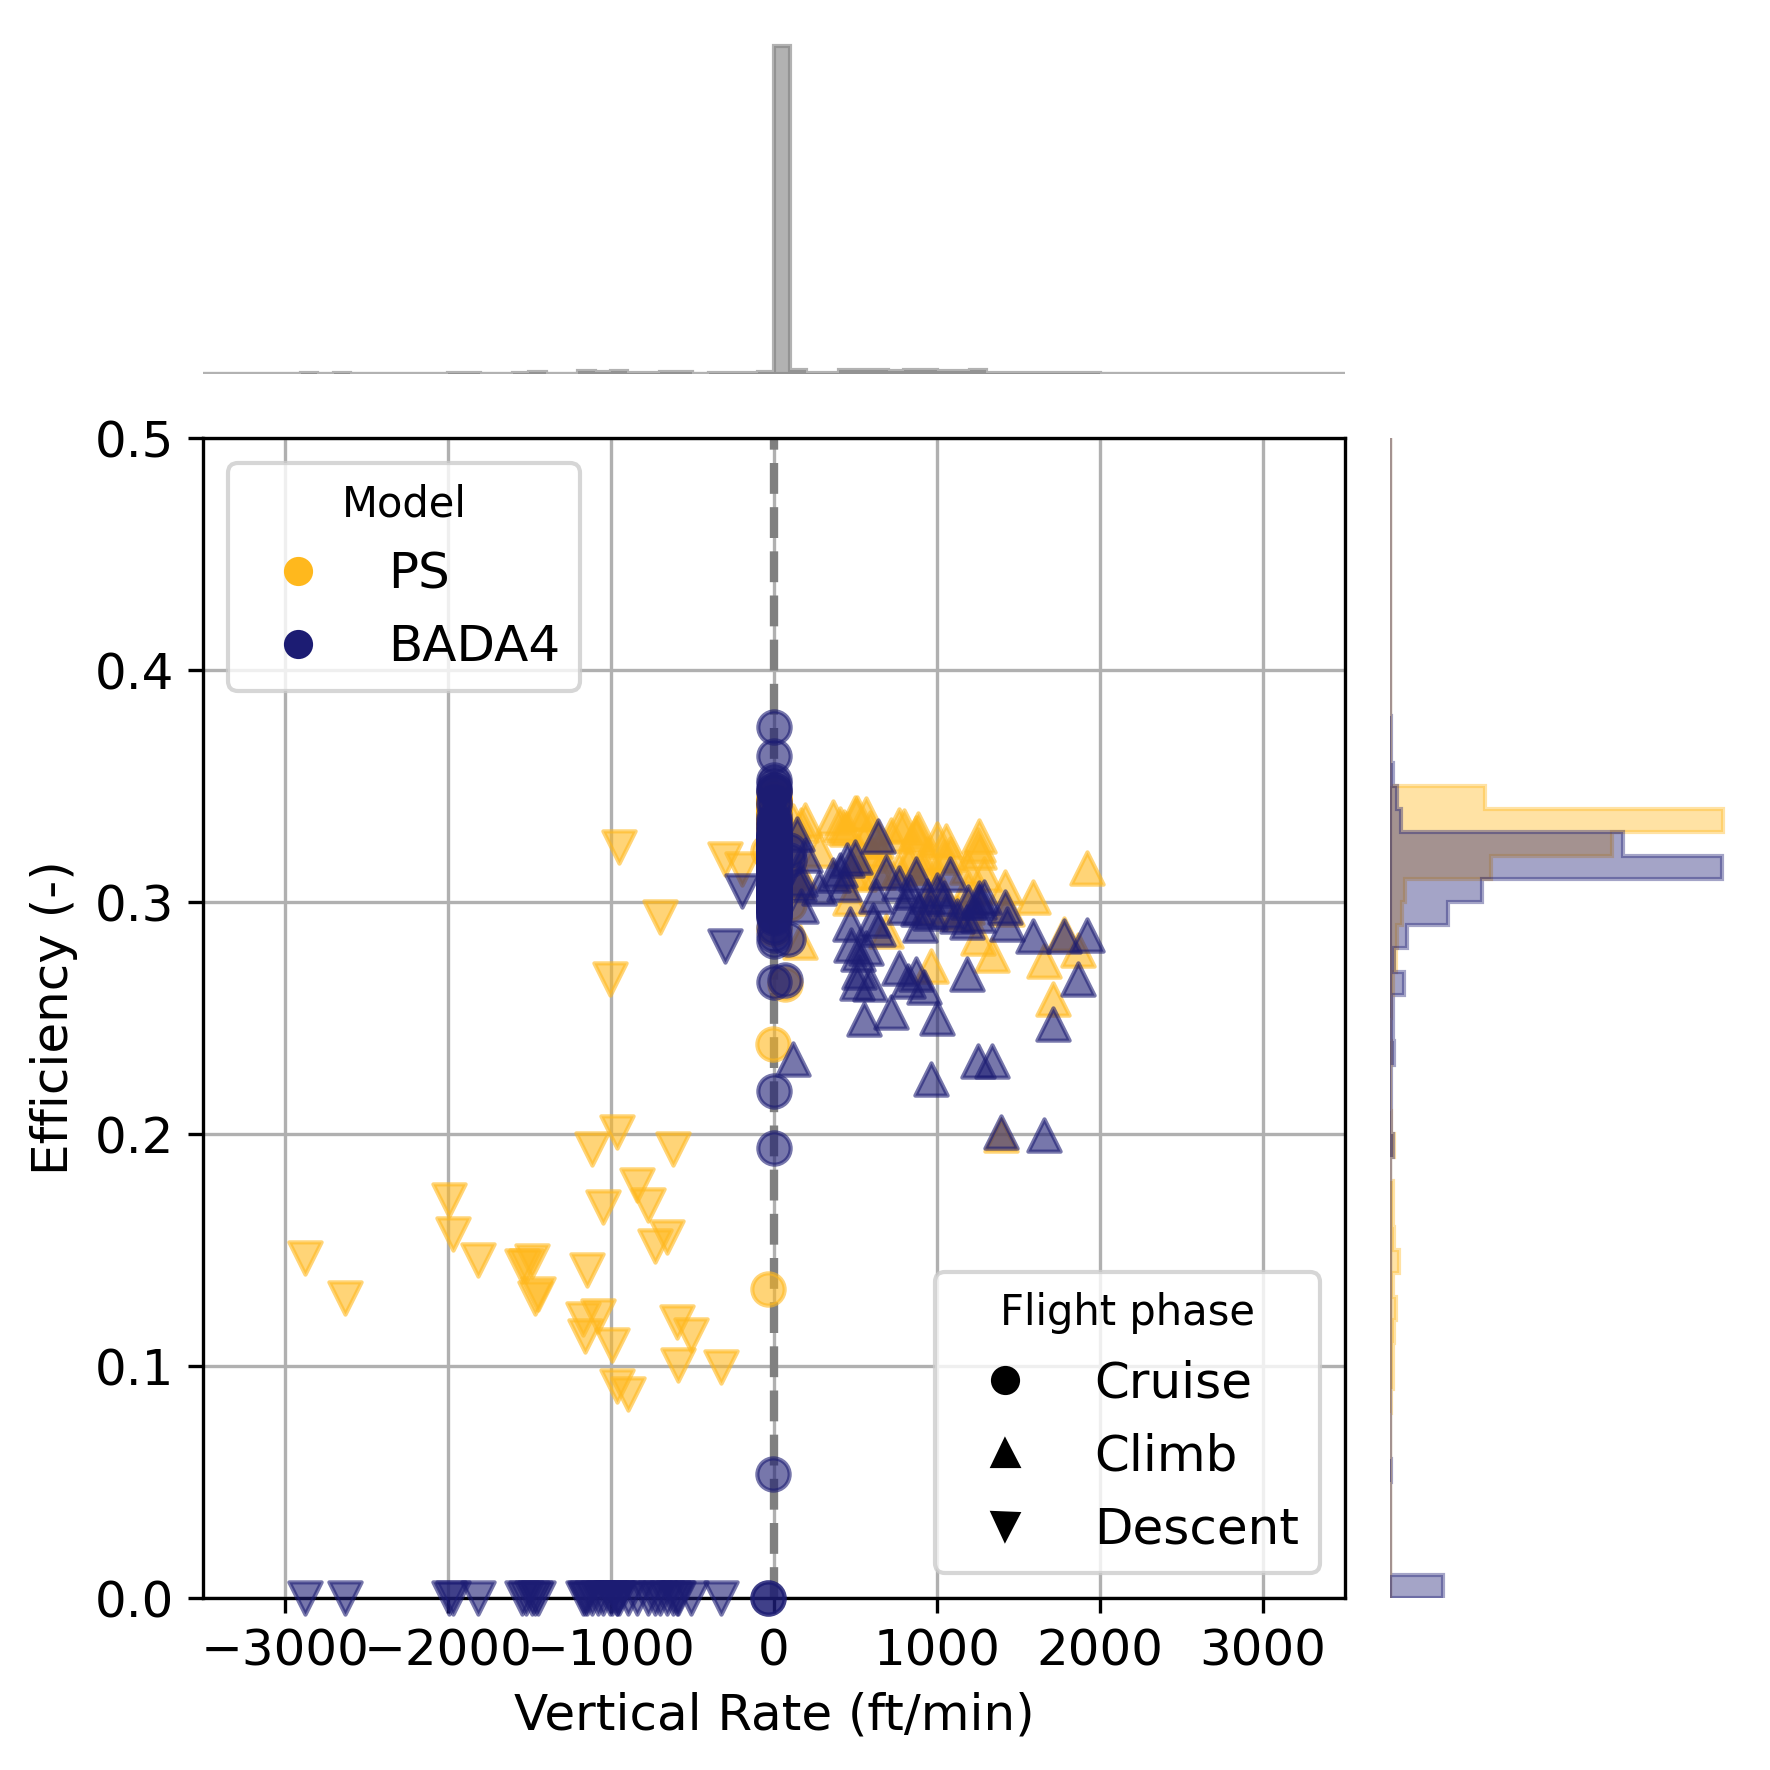

In [6]:
# ===== FIGURE 2: Vertical Rate vs Efficiencies =====
color_PS = "#ffb81d"      # PS efficiency
color_BADA4 = "#1c1c73"  # BADA4 efficiency
hist_color = "#7f7f7f"   # marginal histograms

fig2 = plt.figure(figsize=(6, 6), dpi=300)
gs = fig2.add_gridspec(4, 4)

ax_main = fig2.add_subplot(gs[1:, 0:3])
ax_xhist = fig2.add_subplot(gs[0, 0:3], sharex=ax_main)
ax_yhist = fig2.add_subplot(gs[1:, 3], sharey=ax_main)

for phase, marker in phase_marker_map.items():
    subset = df[df['phase'] == phase]

    ax_main.scatter(
        subset['vertical_rate'],
        subset['efficiency_PS_IAGOS'],
        alpha=0.6,
        label=f"PS – {phase}",
        marker=marker,
        color=color_PS,
        clip_on=False,
        zorder=3,
        s=60
    )

for phase, marker in phase_marker_map.items():
    subset = df[df['phase'] == phase]

    ax_main.scatter(
        subset['vertical_rate'],
        subset['efficiency_BADA4_IAGOS'],
        alpha=0.6,
        label=f"BADA4 – {phase}",
        marker=marker,
        color=color_BADA4,
        clip_on=False,
        zorder=3,
        s=60
    )

handles_color = [
    plt.Line2D([0],[0], marker='o', color=color_PS, linestyle='', label='PS'),
    plt.Line2D([0],[0], marker='o', color=color_BADA4, linestyle='', label='BADA4')
]

handles_marker = [
    plt.Line2D([0],[0], marker=m, color='k', linestyle='', label=p.capitalize())
    for p, m in phase_marker_map.items()
]

legend1 = ax_main.legend(handles=handles_color, title="Model", loc="upper left")
legend2 = ax_main.legend(handles=handles_marker, title="Flight phase", loc="lower right")
ax_main.add_artist(legend1)

ax_main.axvline(0, color='grey', linewidth=2, linestyle="--", zorder=2)

ax_main.set_xlim(-3500, 3500)
ax_main.set_ylim(0, 0.5)

ax_main.set_xlabel("Vertical Rate (ft/min)")
ax_main.set_ylabel("Efficiency (-)")
ax_main.grid(True)

ax_xhist.hist(
    df['vertical_rate'],
    bins=np.arange(-3500, 3600, 100),
    density=True,
    color=hist_color,
    alpha=0.6,
    histtype="stepfilled",
    edgecolor=hist_color
)

ax_yhist.hist(
    df['efficiency_PS_IAGOS'],
    bins=np.arange(0, 0.55, 0.01),
    density=True,
    orientation='horizontal',
    color=color_PS,
    alpha=0.4,
    histtype="stepfilled",
    edgecolor=color_PS
)

ax_yhist.hist(
    df['efficiency_BADA4_IAGOS'],
    bins=np.arange(0, 0.55, 0.01),
    density=True,
    orientation='horizontal',
    color=color_BADA4,
    alpha=0.4,
    histtype="stepfilled",
    edgecolor=color_BADA4
)

ax_xhist.axis('off')
ax_yhist.axis('off')

plt.tight_layout()
plt.savefig("figures/figA5.png", dpi=300, bbox_inches='tight', pad_inches=0.1)
plt.show()

In [8]:
import numpy as np
from sklearn.metrics import r2_score

df1 = df[df["vertical_rate"] >= -100]
for icao in df["icao_code"].unique():
    df_icao = df1[df1["icao_code"] == icao]
    print(icao, len(df_icao))

    x = df_icao["efficiency_BADA4_IAGOS"].values
    y = df_icao["efficiency_PS_IAGOS"].values

    # Root mean square difference
    rmsd = np.sqrt(np.mean((x - y)**2))

    # R² coefficient of determination
    r2 = r2_score(x, y)

    # Slope constrained through origin
    a = np.sum(x * y) / np.sum(x**2)

    # Predictions with zero-intercept model
    y_pred = a * x

    # R² with intercept fixed at 0
    r2_origin = 1 - np.sum((y - y_pred)**2) / np.sum(y**2)

    from scipy.stats import pearsonr
    r, _ = pearsonr(x, y)

    print("BADA4-PS RMSD:", rmsd)
    print(f"BADA4-PS R²:", r2)
    print("BADA4-PS R² (through origin):", r2_origin)
    print("BADA4-PS Pearson r:", r)
    print()

A343 138
BADA4-PS RMSD: 0.017585297510807726
BADA4-PS R²: -0.14841210617580813
BADA4-PS R² (through origin): 0.9979488418925425
BADA4-PS Pearson r: 0.5151411098218812

A333 305
BADA4-PS RMSD: 0.03257795100760532
BADA4-PS R²: -0.5182814629795183
BADA4-PS R² (through origin): 0.995226568843314
BADA4-PS Pearson r: 0.609130815117117

A332 66
BADA4-PS RMSD: 0.03214671648758469
BADA4-PS R²: 0.6282529730558042
BADA4-PS R² (through origin): 0.9895806482197393
BADA4-PS Pearson r: 0.8897040789300429



In [ ]:
# Define flight phases
climb_mask   = df["vertical_rate"] > 100
cruise_mask  = df["vertical_rate"].abs() < 100
descent_mask = df["vertical_rate"] < -100

phases = {
    "climb": climb_mask,
    "cruise": cruise_mask,
    "descent": descent_mask
}

# Build results table
out = pd.DataFrame()

for apm in ["BADA4", "PS"]:
    for phase_name, mask in phases.items():

        # Filter to phase
        df_phase = df.loc[mask]

        # Compute mean IAGOS efficiency grouped by ICAO code
        means = df_phase.groupby("icao_code")[f"efficiency_{apm}_IAGOS"].mean()

        # Column name example: 'PS_climb'
        col_name = f"{apm}_{phase_name}"

        out[col_name] = means

# Sort rows by ICAO code
out = out.sort_index()
out

,BADA4_climb,BADA4_cruise,BADA4_descent,PS_climb,PS_cruise,PS_descent
icao_code,,,,,,
A332,0.285205,0.311776,0.000000,0.291051,0.311042,0.132572
A333,0.274918,0.314087,0.061846,0.315466,0.336675,0.215199
A343,0.289032,0.313163,0.000000,0.306525,0.323004,0.152091
